# MNC-KAIST
## (3) DataLoader
### 2021 / 12 / 24
Copyright (C) 2019 Kangyeol Kim kangyeolk@kaist.ac.kr & Sanghyeon Lee shlee6825@kaist.ac.kr

In [14]:
!pip install torch
!pip install torchvision
!pip install matplotlib
import os
import torch
import argparse
import numpy as np
import torchvision
import torchvision.models as models
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
%matplotlib inline

## [1] 간단한 데이터 다운로드를 위한 pytorch API의 활용

### MNIST 데이터
- 60000 training images 
- 10000 validation images 
- 10 classes = [0,1,2,3,4,5,6,7,8,9]

In [15]:
train_d = torchvision.datasets.MNIST(root = './data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_d = torchvision.datasets.MNIST(root = './data', train=False, download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=32, shuffle=False)

In [16]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 60000, 총 테스트 데이터 개수 : 10000


In [17]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 1875, 테스트 데이터 배치 개수 : 313


C:\Users\user\AppData\Local\Temp/ipykernel_4996/3942759955.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


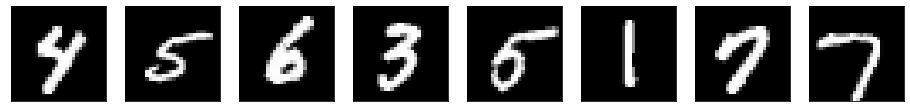

In [18]:
def show_mnist():
    for images, _ in train_loader:
        images_to_show = images.squeeze().numpy()
        fig=plt.figure(figsize=(16, 2))
        for i in range(8):
            fig.add_subplot(1, 8, i+1)
            plt.imshow(images_to_show[i], cmap='gray')
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break
show_mnist()

### CIFAR-10 데이터
- 50000 training images 
- 10000 validation images 
- 10 classes = [airplane, car, truck, frog, ...]
- for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [19]:
train_d = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_d = torchvision.datasets.CIFAR10('./data', train=False, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=32, shuffle=False)

Files already downloaded and verified


In [20]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 50000, 총 테스트 데이터 개수 : 10000


In [21]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 1563, 테스트 데이터 배치 개수 : 313


C:\Users\user\AppData\Local\Temp/ipykernel_4996/689663364.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


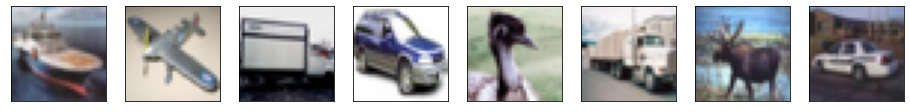

In [22]:
def show_image(loader, fig_num=8):
    for images, _ in loader:
        images_to_show = images.numpy().transpose((0,2,3,1))
        fig=plt.figure(figsize=(16, 5))
        for i in range(fig_num):
            fig.add_subplot(1, fig_num, i+1)
            plt.imshow(images_to_show[i])
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break
show_image(train_loader)

## [2] Pytorch ImageFolder를 통해 손쉽게 데이터로더 만들기

In [23]:
import os 
if not os.path.exists('./data/minidata/train'):
    os.makedirs ('./data/minidata/train')
    os.makedirs ('./data/minidata/val')

train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=torchvision.transforms.ToTensor())                        
test_d = torchvision.datasets.ImageFolder('./data/minidata/val',transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=10, shuffle=False)

In [24]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 20, 총 테스트 데이터 개수 : 6


In [25]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 2, 테스트 데이터 배치 개수 : 1


In [26]:
# 에러가 예측됩니다. 사진 사이즈가 다양하기 때문입니다.
for images, _ in train_loader:
    print(images)
    break

RuntimeError: stack expects each tensor to be equal size, but got [3, 510, 720] at entry 0 and [3, 183, 275] at entry 1

In [27]:
# 서로 다른 사이즈의 이미지를 받아오기 위해서는 전처리를 해줘야 합니다.
# 많은 이미지를 가지고 있다고 할 때 이것들을 일괄적으로 해결해주는 것이 쉽지 않습니다.
# transforms함수는 이를 한방에 처리해줍니다.
transform=torchvision.transforms.Compose([
                              torchvision.transforms.Resize((224, 224)),
                              torchvision.transforms.ToTensor(),                                           
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

C:\Users\user\AppData\Local\Temp/ipykernel_4996/689663364.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


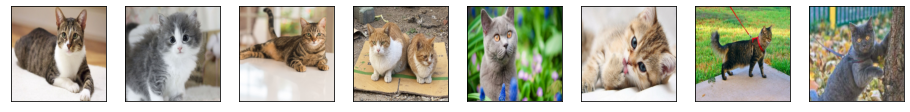

In [28]:
show_image(train_loader)

In [29]:
# 큰 사진의 경우 이를 cropping해서 사용한다면 데이터 증대의 효과를 누릴 수 있습니다.
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),                                           
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

C:\Users\user\AppData\Local\Temp/ipykernel_4996/689663364.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


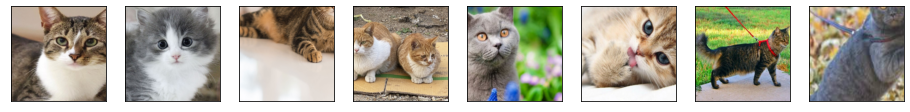

In [30]:
show_image(train_loader)

In [31]:
# 풍경 사진의 경우에는 어색할 수 있으나, 자연의 다양한 사진은 flipping이나 rotation을 해도 어색하지 않으며, 
#이 또한 데이터 증대의 효과를 가집니다. 
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.RandomRotation((-180, 180)),
                              torchvision.transforms.RandomHorizontalFlip(),
                              torchvision.transforms.RandomVerticalFlip(),
                              torchvision.transforms.ToTensor(),                                
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

C:\Users\user\AppData\Local\Temp/ipykernel_4996/689663364.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


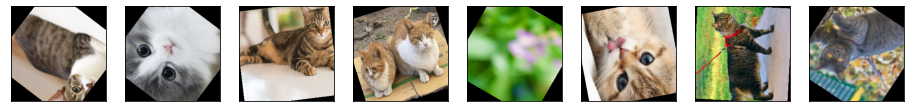

In [32]:
show_image(train_loader)

In [33]:
# 한 가지 이미지 데이터를 다룰 때 주의할 점: normalize는 필수!!
# 하나의 사진 데이터가 가지는 평균을 0으로, 표준편차를 1로 맞춰줌으로써 더욱 generalizable한 성능을 기대합니다 
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),                   
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

In [34]:
# 데이터가 적기에 img 자체가 모든 학습 데이터를 가지고 있습니다. 여기서 평균과 표준편차을 구해줍니다.
for img,_ in train_loader:
    ave = torch.stack([img[:,0].mean(),img[:,1].mean(),img[:,2].mean()])
    standard = torch.stack([img[:,0].std(),img[:,1].std(),img[:,2].std()])
print(ave.tolist())
print(standard.tolist())

[0.5948872566223145, 0.5493416786193848, 0.4751681983470917]
[0.27876731753349304, 0.274566650390625, 0.29532331228256226]


In [35]:
# 구해준 평균과 표준편차를 사용하여 이미지를 normalize해줍니다.
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(mean=ave.tolist(),std=standard.tolist())

                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)   
test_d = torchvision.datasets.ImageFolder('./data/minidata/val',transform=transform)                       

train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)
test_loader= torch.utils.data.DataLoader(test_d, batch_size=10, shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\user\AppData\Local\Temp/ipykernel_4996/689663364.py:10: UserWarning: Matplotlib is currently using module://mat

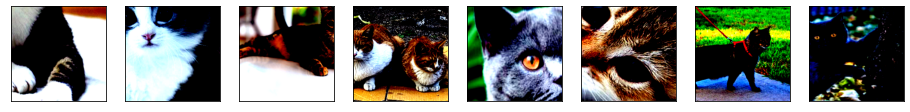

In [36]:
# 사진의 범위가 안 맞기에 색이 변색되어보이고 에러 문자가 뜹니다. 제대로 프린트해주기 위해서는
# 사진을 다시 표준편차를 곱하고 평균을 더하는 작업을 해줘야 합니다.
show_image(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\user\AppData\Local\Temp/ipykernel_4996/689663364.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


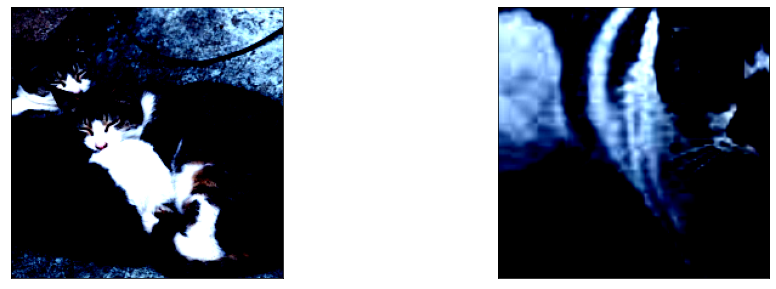

In [37]:
show_image(test_loader, fig_num=2)

## [3] Custom 데이터 로드 만들기

In [39]:
def show_image2(loader, fig_num=8):
    for images, _, _ in loader:
        images_to_show = images.numpy().transpose((0,2,3,1))
        fig=plt.figure(figsize=(16, 5))
        for i in range(fig_num):
            fig.add_subplot(1, fig_num, i+1)
            plt.imshow(images_to_show[i])
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break

In [40]:
# Custom Dataloader 를 만들어 봅시다.
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision import datasets, transforms

from PIL import Image
import os
from glob import glob

# Dataloader는 기본적으로 아래와 같은 형식으로 작성합니다. 

class CustomeImageDataset(Dataset):
    # 생성자 정의
    def __init__(self, ):
        pass
    # len 함수에 의해 호출됨, __iter__나 __getitem__을 호출해서 IndexError 가 나올 떄 까지 for loop를 제공함
    def __len__(self, ):
        pass
    
    #  슬라이싱을 구현할 수 있도록 돕는 메소드
    def __getitem__(self, ):
        pass
    
# print(len(myclass))

In [41]:
class CustomNumbers:
  def __init__(self):
    self._numbers = [n for n in range(1, 11)]

a = CustomNumbers()
a._numbers[2:5]
# [3, 4, 5]


[3, 4, 5]

In [42]:
class CustomNumbers:
    def __init__(self):
        self._numbers = [n for n in range(1, 11)]

    def __getitem__(self, idx):
        return self._numbers[idx]

a = CustomNumbers()
a[2:7]
# [3, 4, 5, 6, 7]


[3, 4, 5, 6, 7]

In [43]:
class CustomNumbers:
    def __init__(self):
        self._numbers = [n for n in range(1, 11)]

    def __len__(self):
        return len(self._numbers)

    def __getitem__(self, idx):
        return self._numbers[idx]

a = CustomNumbers()
for i in a:
    print(i)
# [3, 4, 5, 6, 7]


1
2
3
4
5
6
7
8
9
10


[]


In [51]:
# 원하는 Image 와 label 그리고 name 을 반환하는 Dataset을 만들어 봅시다. 

class CustomeImageDataset(Dataset):
    def __init__(self, train_dir = './data/minidata/train', image_size = 64):
        self.train_dir = train_dir
        self.train_data = glob(os.path.join(self.train_dir, '*', '*'))
        self.transform = transforms.Compose([transforms.Resize((image_size,image_size)),
                                             transforms.ToTensor(),
                                             ])
    def __len__(self):
        return len(self.train_data)
    
    def __getitem__(self, index):
        image = Image.open(self.train_data[index]).convert('RGB')
        image = self.transform(image)
        print(self.train_data[index])
        image_name = self.train_data[index].split('\\')[-1] # Window
        # image_name = self.train_data[index].split('/')[-1] # Linux

        if self.train_data[index].split('\\')[-2] == 'cat': # Window
        # if self.train_data[index].split('/')[-2] == 'cat':

            label = 0
        elif self.train_data[index].split('\\')[-2] =='dog': # Window
        # elif self.train_data[index].split('/')[-1] =='dog': # Linux

            label = 1
        return image, label, image_name

    
    
mydataset = CustomeImageDataset()
print('Dataset의 개수',len(mydataset))
mydataset[1]

Dataset의 개수 20
./data/minidata/train\cat\2047160_528296_3416.png


(tensor([[[0.5765, 0.6118, 0.6314,  ..., 0.8353, 0.8353, 0.8275],
          [0.5843, 0.6275, 0.6549,  ..., 0.8353, 0.8353, 0.8275],
          [0.5843, 0.6275, 0.6510,  ..., 0.8314, 0.8314, 0.8314],
          ...,
          [0.6510, 0.7804, 0.8745,  ..., 0.7451, 0.7451, 0.7216],
          [0.5608, 0.7333, 0.8745,  ..., 0.7686, 0.7804, 0.7804],
          [0.5098, 0.6941, 0.8667,  ..., 0.7961, 0.8000, 0.8275]],
 
         [[0.4745, 0.5255, 0.5529,  ..., 0.8314, 0.8353, 0.8392],
          [0.5294, 0.5804, 0.5961,  ..., 0.8314, 0.8353, 0.8392],
          [0.5451, 0.5882, 0.6078,  ..., 0.8275, 0.8392, 0.8431],
          ...,
          [0.6431, 0.7961, 0.8941,  ..., 0.7412, 0.7373, 0.7176],
          [0.5608, 0.7490, 0.8941,  ..., 0.7451, 0.7569, 0.7529],
          [0.5059, 0.7098, 0.8863,  ..., 0.7647, 0.7725, 0.8000]],
 
         [[0.4078, 0.4627, 0.4941,  ..., 0.8157, 0.8196, 0.8275],
          [0.4863, 0.5412, 0.5608,  ..., 0.8118, 0.8196, 0.8314],
          [0.5059, 0.5569, 0.5765,  ...,

./data/minidata/train\cat\201904291390027161_3.jpg


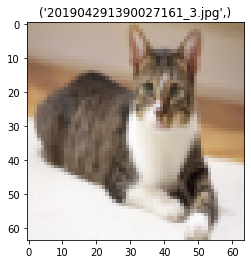

Class: 0


In [56]:
# 데이터를 확인해 봅시다 !
image, label, name = next(iter(torch.utils.data.DataLoader(mydataset, batch_size=1, shuffle=False)))
im = plt.imshow(image[0].permute(1,2,0))
plt.title(name)
plt.show()
plt.close()
print('Class:', label.item())

./data/minidata/train\cat\201904291390027161_3.jpg
./data/minidata/train\cat\2047160_528296_3416.png
./data/minidata/train\cat\45454aa.jpg
./data/minidata/train\cat\68033_61662_5258.jpg
./data/minidata/train\cat\cat1.jpg
./data/minidata/train\cat\cattac.jpg
./data/minidata/train\cat\images (1)1.jpg
./data/minidata/train\cat\images343.jpg
./data/minidata/train\cat\walking-cat.jpg
./data/minidata/train\cat\_103218321_gettyimages-134815902.jpg


C:\Users\user\AppData\Local\Temp/ipykernel_4996/1259668009.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


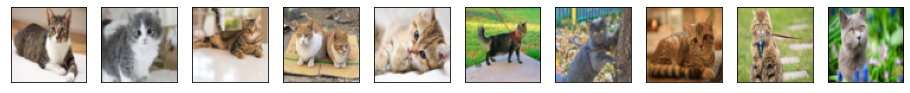

In [47]:
# Test DataLoader를 만들어 봅시다. 
train_loader = torch.utils.data.DataLoader(mydataset, batch_size=10, shuffle=False)
show_image2(train_loader, fig_num=10)

In [48]:
# DataLoader 사용법 
for batch, (image, label, name) in enumerate(train_loader):
    print(batch, name)
    break
    

./data/minidata/train\cat\201904291390027161_3.jpg
./data/minidata/train\cat\2047160_528296_3416.png
./data/minidata/train\cat\45454aa.jpg
./data/minidata/train\cat\68033_61662_5258.jpg
./data/minidata/train\cat\cat1.jpg
./data/minidata/train\cat\cattac.jpg
./data/minidata/train\cat\images (1)1.jpg
./data/minidata/train\cat\images343.jpg
./data/minidata/train\cat\walking-cat.jpg
./data/minidata/train\cat\_103218321_gettyimages-134815902.jpg
0 ('201904291390027161_3.jpg', '2047160_528296_3416.png', '45454aa.jpg', '68033_61662_5258.jpg', 'cat1.jpg', 'cattac.jpg', 'images (1)1.jpg', 'images343.jpg', 'walking-cat.jpg', '_103218321_gettyimages-134815902.jpg')
